In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
# 1. Número de embarazos.
# 2. Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
# 3. Presión arterial diastólica (mm Hg).
# 4. Grosor del pliegue de la piel del tríceps (mm).
# 5. Insulina sérica de 2 horas (mu U/ml).
# 6. Índice de masa corporal.
# 7. Función del pedigrí de la diabetes.
# 8. Edad (años).
# 9. Clase, aparición de diabetes en un plazo de cinco años.

path = "./dataset/Pima_Indians_Diabetes_Database.csv"
# dataset = pd.read_csv(path, delimiter=",")
# dataset.head(10)

dataset = pd.read_csv(path, delimiter=",")
# Mostrar el DataFrame original
print("DataFrame original:")
print(dataset.head())
# dataset = dataset.sample(frac=1)
# dataset = dataset.to_numpy()
# np.size(dataset, 0)


DataFrame original:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Eliminar la primera fila del DataFrame original
dataset = dataset.iloc[1:].reset_index(drop=True)

print("\nDataFrame original sin la primera fila:")
print(dataset.head())


DataFrame original sin la primera fila:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       85             66             29        0  26.6   
1            8      183             64              0        0  23.3   
2            1       89             66             23       94  28.1   
3            0      137             40             35      168  43.1   
4            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.351   31        0  
1                     0.672   32        1  
2                     0.167   21        0  
3                     2.288   33        1  
4                     0.201   30        0  


In [4]:
dataset = dataset.sample(frac=1)
dataset = dataset.to_numpy()
np.size(dataset, 0)

np.random.seed(7)

In [5]:
# Obtener el número de valores de entrenamiento, validacion, test a utilizar

numbers_val = round((np.size(dataset,0) * 20) / 100)

numbers_test = round((np.size(dataset,0) * 20) / 100)

numbers_train = np.size(dataset,0) - numbers_val - numbers_test

In [6]:
# Obtener el dataset para entrenamiento, validación, test
X_train = dataset[0:numbers_train,0:8]
Y_train = dataset[0:numbers_train,8]

X_val = dataset[numbers_train:(numbers_train+numbers_val), 0:8]
Y_val = dataset[numbers_train:(numbers_train+numbers_val), 8]

X_test = dataset[(numbers_train+numbers_val):np.size(dataset,0),0:8]
Y_test = dataset[(numbers_train+numbers_val):np.size(dataset,0),8]

print(X_train)
print(X_val)
print(X_test)

[[  4.    123.     80.    ...  32.      0.443  34.   ]
 [  3.    150.     76.    ...  21.      0.207  37.   ]
 [  8.    124.     76.    ...  28.7     0.687  52.   ]
 ...
 [  2.    118.     80.    ...  42.9     0.693  21.   ]
 [  1.    168.     88.    ...  35.      0.905  52.   ]
 [  1.    153.     82.    ...  40.6     0.687  23.   ]]
[[4.00e+00 9.50e+01 6.00e+01 ... 3.54e+01 2.84e-01 2.80e+01]
 [3.00e+00 1.00e+02 6.80e+01 ... 3.16e+01 9.49e-01 2.80e+01]
 [7.00e+00 1.14e+02 6.40e+01 ... 2.74e+01 7.32e-01 3.40e+01]
 ...
 [2.00e+00 1.97e+02 7.00e+01 ... 3.05e+01 1.58e-01 5.30e+01]
 [4.00e+00 9.20e+01 8.00e+01 ... 4.22e+01 2.37e-01 2.90e+01]
 [7.00e+00 1.14e+02 7.60e+01 ... 2.38e+01 4.66e-01 3.10e+01]]
[[  6.     85.     78.    ...  31.2     0.382  42.   ]
 [  0.    102.     64.    ...  40.6     0.496  21.   ]
 [  3.     74.     68.    ...  29.7     0.293  23.   ]
 ...
 [  4.    148.     60.    ...  30.9     0.15   29.   ]
 [  1.    109.     56.    ...  25.2     0.833  23.   ]
 [  9.     7

In [7]:
# Crear Modelo con Keras

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Preparar modelo con optimizador, error y metrica
opt = Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [19]:
# Entrenar modelo

history = model.fit(X_train, Y_train, epochs=150, batch_size=10,validation_data=(X_val, Y_val))

Train on 461 samples, validate on 153 samples
Epoch 1/150
461/461 [==============================] - 0s 291us/step - loss: 0.5315 - accuracy: 0.7202 - val_loss: 0.6025 - val_accuracy: 0.7255
Epoch 2/150
461/461 [==============================] - 0s 178us/step - loss: 0.4808 - accuracy: 0.7527 - val_loss: 0.5795 - val_accuracy: 0.7059
Epoch 3/150
461/461 [==============================] - 0s 167us/step - loss: 0.4792 - accuracy: 0.7787 - val_loss: 0.5835 - val_accuracy: 0.7190
Epoch 4/150
461/461 [==============================] - 0s 167us/step - loss: 0.4756 - accuracy: 0.7657 - val_loss: 0.6067 - val_accuracy: 0.7059
Epoch 5/150
461/461 [==============================] - 0s 158us/step - loss: 0.4904 - accuracy: 0.7484 - val_loss: 0.5771 - val_accuracy: 0.7255
Epoch 6/150
461/461 [==============================] - 0s 174us/step - loss: 0.4754 - accuracy: 0.7679 - val_loss: 0.5526 - val_accuracy: 0.7451
Epoch 7/150
461/461 [==============================] - 0s 171us/step - loss: 0.4923 

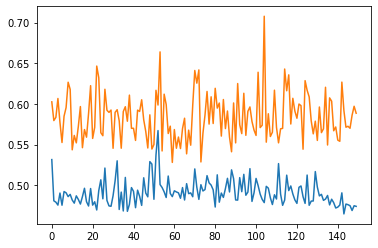

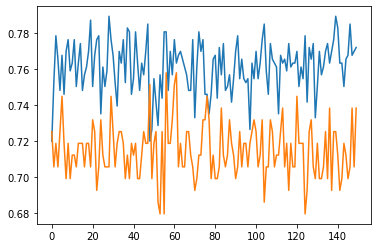

In [21]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'])


plt.show()

plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'])

plt.show()


In [137]:
class TrainingPlot(keras.callbacks.Callback):
    def __init__(self, clear_figure=False):
        super().__init__()
        self.epochs = []
        self.history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}
        self.clear_figure = clear_figure
        
        if self.clear_figure:
            plt.ion()  # Modo interactivo

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch + 1)
        self.history['loss'].append(logs.get('loss'))
        self.history['accuracy'].append(logs.get('accuracy'))
        self.history['val_loss'].append(logs.get('val_loss'))
        self.history['val_accuracy'].append(logs.get('val_accuracy'))

        if (epoch + 1) % 100 == 0:
            self.plot_metrics(epoch)
            self.print_metrics()

    def plot_metrics(self, epoch):
        if self.clear_figure:
            plt.close()  # Cierra la figura anterior si está abierta
        
        epochs_range = self.epochs

        fig, axs = plt.subplots(1, 2, figsize=(14, 5))
        
        # Plotear la pérdida
        axs[0].plot(epochs_range, self.history['loss'], label='Training Loss')
        axs[0].plot(epochs_range, self.history['val_loss'], label='Validation Loss')
        axs[0].set_xlabel('Epoch')
        axs[0].set_ylabel('Loss')
        axs[0].set_title('Training and Validation Loss')
        axs[0].legend()

        # Plotear la precisión
        axs[1].plot(epochs_range, self.history['accuracy'], label='Training Accuracy')
        axs[1].plot(epochs_range, self.history['val_accuracy'], label='Validation Accuracy')
        axs[1].set_xlabel('Epoch')
        axs[1].set_ylabel('Accuracy')
        axs[1].set_title('Training and Validation Accuracy')
        axs[1].legend()

        fig.suptitle(f'Epoch {epoch + 1}')
        plt.show()
        plt.pause(0.001)  # Pausa breve para actualizar la gráfica

    def print_metrics(self):
        print(f"Epoch {self.epochs[-1]} - Train Loss: {self.history['loss'][-1]}")
        print(f"Epoch {self.epochs[-1]} - Validation Loss: {self.history['val_loss'][-1]}")
        print("===================================")
        print(f"Epoch {self.epochs[-1]} - Train Accuracy: {self.history['accuracy'][-1]}")
        print(f"Epoch {self.epochs[-1]} - Validation Accuracy: {self.history['val_accuracy'][-1]}")

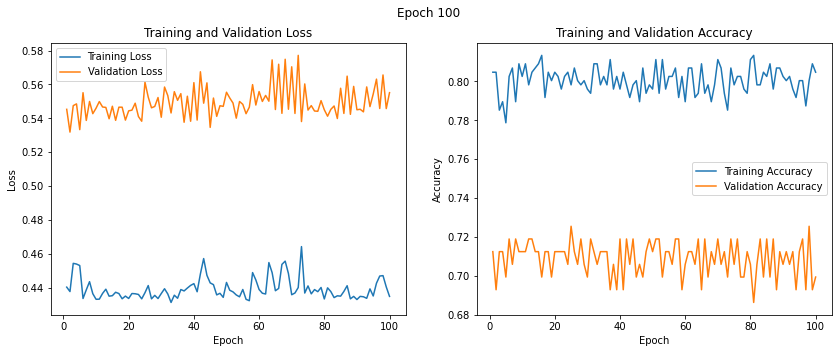

Epoch 100 - Train Loss: 0.43493753930234597
Epoch 100 - Validation Loss: 0.5551519064731847
Epoch 100 - Train Accuracy: 0.8047722578048706
Epoch 100 - Validation Accuracy: 0.6993464231491089


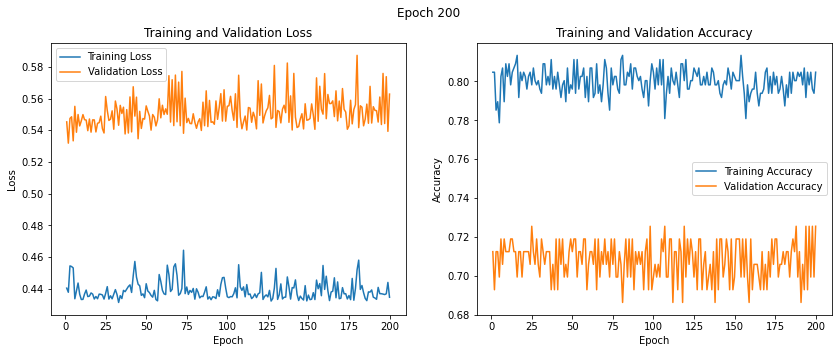

Epoch 200 - Train Loss: 0.43462983581869824
Epoch 200 - Validation Loss: 0.5628450281090207
Epoch 200 - Train Accuracy: 0.8047722578048706
Epoch 200 - Validation Accuracy: 0.7254902124404907


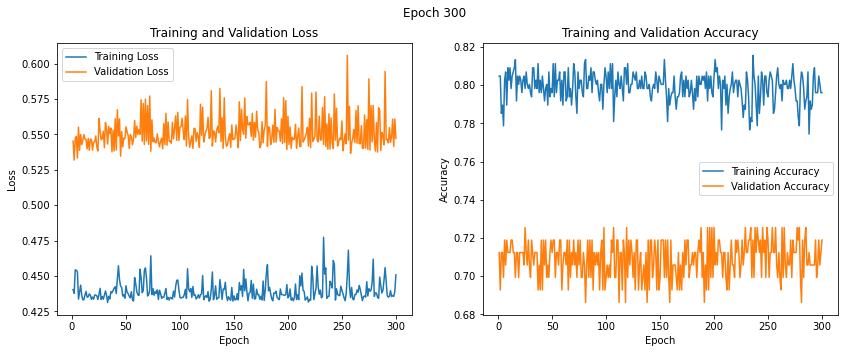

Epoch 300 - Train Loss: 0.45083637687492784
Epoch 300 - Validation Loss: 0.5472180309638478
Epoch 300 - Train Accuracy: 0.7960954308509827
Epoch 300 - Validation Accuracy: 0.7189542651176453


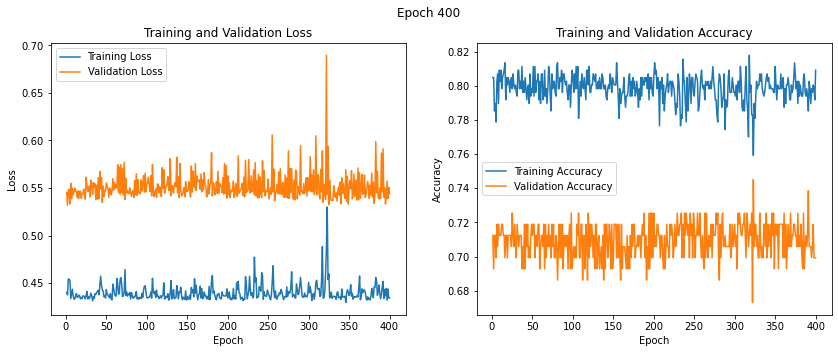

Epoch 400 - Train Loss: 0.4344435246932015
Epoch 400 - Validation Loss: 0.5438788237135395
Epoch 400 - Train Accuracy: 0.8091106414794922
Epoch 400 - Validation Accuracy: 0.6993464231491089


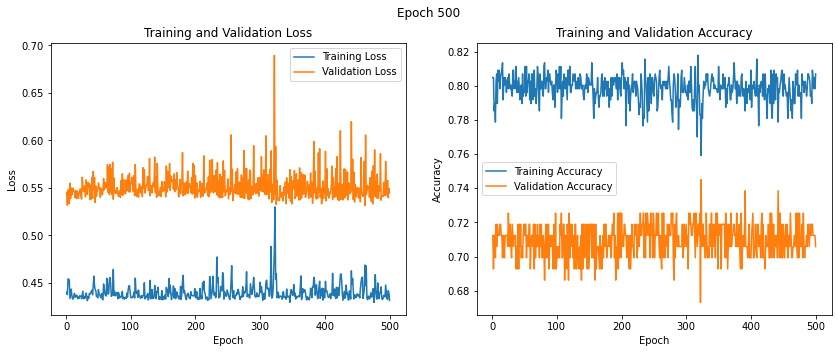

Epoch 500 - Train Loss: 0.431722841720519
Epoch 500 - Validation Loss: 0.5451308237571343
Epoch 500 - Train Accuracy: 0.8069414496421814
Epoch 500 - Validation Accuracy: 0.7058823704719543


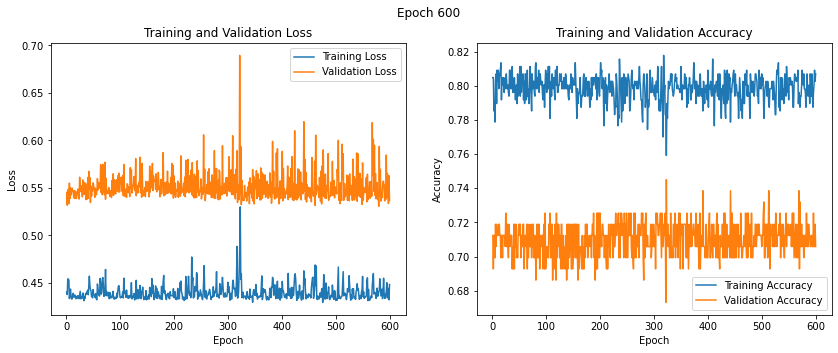

Epoch 600 - Train Loss: 0.44844745245000545
Epoch 600 - Validation Loss: 0.5369002150943856
Epoch 600 - Train Accuracy: 0.8069414496421814
Epoch 600 - Validation Accuracy: 0.7058823704719543


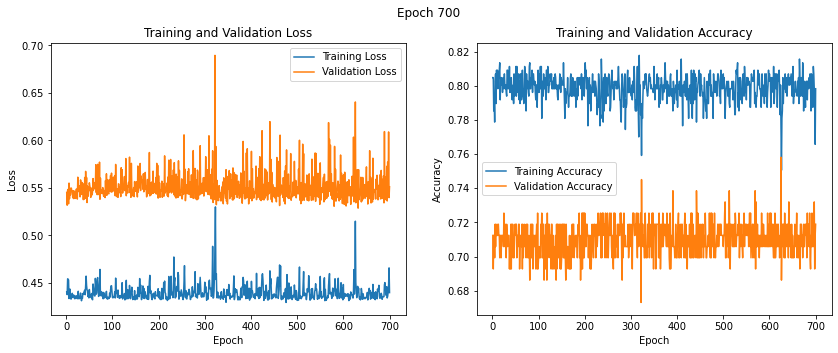

Epoch 700 - Train Loss: 0.43992274113952984
Epoch 700 - Validation Loss: 0.5512861171189476
Epoch 700 - Train Accuracy: 0.7982646226882935
Epoch 700 - Validation Accuracy: 0.7189542651176453


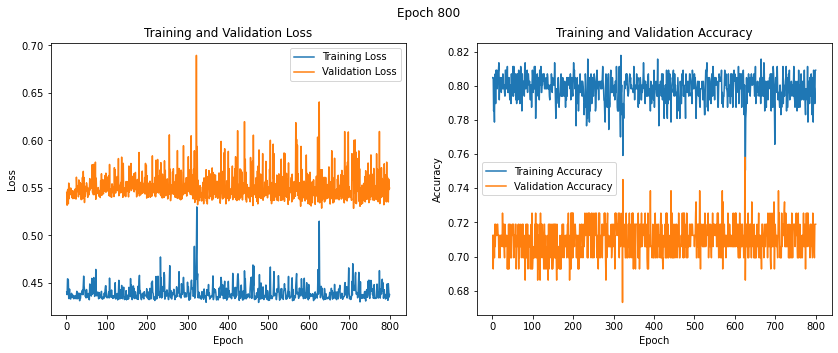

Epoch 800 - Train Loss: 0.4378440438278844
Epoch 800 - Validation Loss: 0.5498070282484192
Epoch 800 - Train Accuracy: 0.8091106414794922
Epoch 800 - Validation Accuracy: 0.7189542651176453


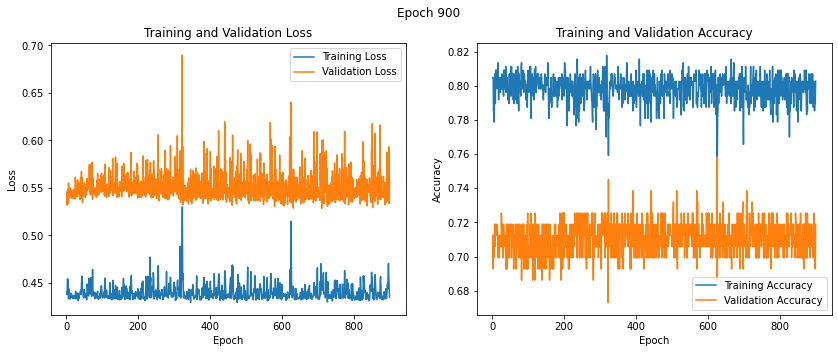

Epoch 900 - Train Loss: 0.4352923142935862
Epoch 900 - Validation Loss: 0.5586113781710855
Epoch 900 - Train Accuracy: 0.8026030659675598
Epoch 900 - Validation Accuracy: 0.7189542651176453


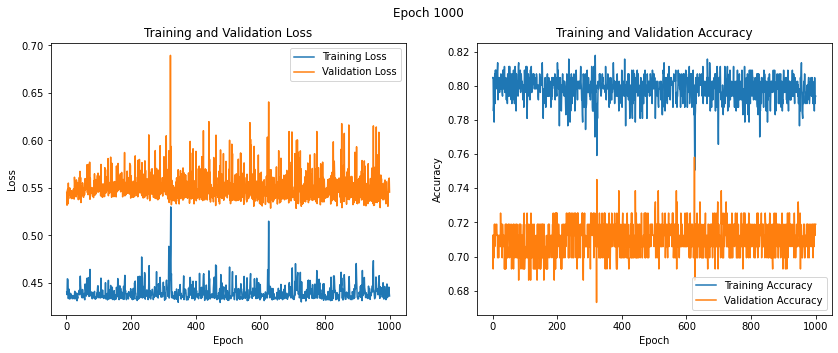

Epoch 1000 - Train Loss: 0.43640481724268443
Epoch 1000 - Validation Loss: 0.5456392488448448
Epoch 1000 - Train Accuracy: 0.7939262390136719
Epoch 1000 - Validation Accuracy: 0.7189542651176453


In [138]:
# Crear la instancia de la callback
custom_callback = TrainingPlot(clear_figure=True)

model.fit(X_train, Y_train, epochs=1000, validation_data=(X_val, Y_val), batch_size=50, verbose=0, callbacks=[custom_callback])

In [140]:
# evalua el modelo
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

153/153 [==============================] - 0s 39us/step

accuracy: 81.05%


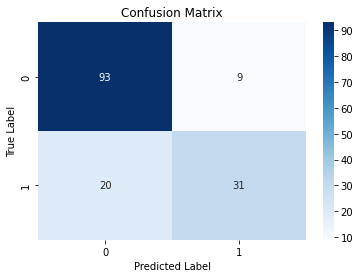

In [149]:
y_pred = model.predict_classes(X_test)

conf_mat = confusion_matrix(Y_test, y_pred)

# Visualización de la matriz de confusión
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()